In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# pip install patsy
# pip install statsmodels
import statsmodels.formula.api as smf
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)



# great tutorial 
# http://chrisalbon.com/python/pandas_list_unique_values_in_column.html
# advanced jupyter tricks
# http://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/

In [24]:
# define url
url_0331 = '/Users/shaokuixing/Desktop/whatever/survey_vt_20160331.csv'

In [25]:
# read csv file
rawData = pd.read_csv(url_0331, sep=';', thousands = '.', decimal =',')

In [26]:
# seletct features related to impression and time viewable
subset_rawData=rawData[['deliveredimp','viewableimp','viewableimp_ic','totalviewtime','avgVT/ImpSec','avgTVScale']]

In [27]:
# select only viewable imp and total time viewable
subset_rawData1 = subset_rawData[['viewableimp','totalviewtime']]
subset_rawData1.dtypes

viewableimp      int64
totalviewtime    int64
dtype: object

In [30]:
# select distinct, list unique values in funnel column
rawData.funnel.unique()

array(['Purchase Intent', 'Interest', 'Recall'], dtype=object)

In [32]:
# filter out data with more than 50 imp and 2500,000 total time viewable
subset_rawData2 = rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Interest')]
# check size
subset_rawData2.shape

(21659, 21)

In [36]:
# select only viewable imp and totaol time viewable
# subset_rawData3 = subset_rawData2[['viewableimp','totalviewtime']]
imp = subset_rawData2['viewableimp']
vtsec = subset_rawData2['totalviewtime']/1000
# result = pd.concat([df1, df4], axis=1)
subset_rawData3 = pd.concat([imp,vtsec], axis=1)
subset_rawData3.shape

(21659, 2)

In [39]:
subset_rawData3.dtypes

viewableimp        int64
totalviewtime    float64
dtype: object

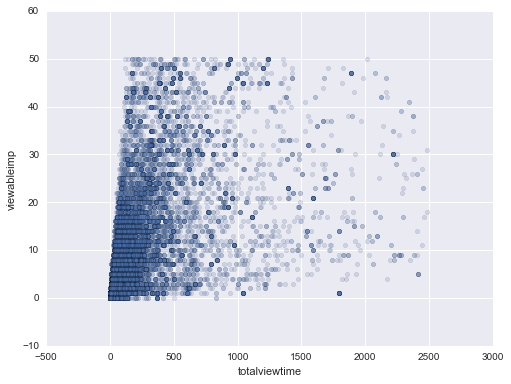

In [40]:
# visualize the relationship between viewable imp and total time viewable
# scatter plot
subset_rawData3.plot(kind='scatter', x='totalviewtime', y='viewableimp', alpha=0.2)

In [59]:
# total row count
funnel = rawData['funnel']
# subset_rawData2 = rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000) & (rawData['funnel']=='Interest')]
interest = rawData[ (rawData['funnel']=='Interest')]['funnel']
interest.count()

24343

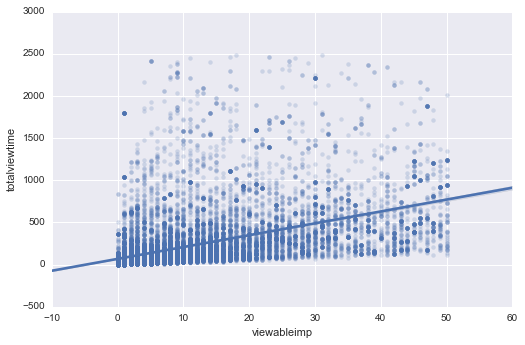

In [62]:
# Seaborn scatter plot with regression line
# sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})
# create a fitted model in 1 line
sns.lmplot(x='viewableimp', y='totalviewtime', data=subset_rawData3, aspect=1.5,scatter_kws={'alpha':0.2} )


In [88]:
# subset recall and other metrics
# recall_metrics = rawData[ (rawData['funnel']=='Recall')].set_index('answerid')
recall_metrics =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Recall')]
recall_metrics.shape


(22232, 21)

In [91]:
#recall_metrics.head()

In [89]:
# LOAD Magic
#%reload_ext rpy2.ipython
#%R summary(recall_metrics)
# recall_metrics.shape
#recall_metrics.head(5)
# list unique values
# rawData.answerid.unique
# count unique values group by
# rawData.groupby('YEARMONTH').CLIENTCODE.nunique()
# unique counts in a series
# rawData['answerid'].value_counts
# count number of uniques
recall_metrics['answerid'].nunique()

10549

In [92]:
recall_metrics.head(1).transpose()

,2
surveyid,291
originaladid,36431
format,swipe
market,FI
uid,6.96526e+18
answersetid,256196
answerid,700781
questionid,84
questiontext,Have you seen this ad on a mobile device before?
optionid,258


In [151]:
recall_metrics =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Recall')]
# sub_recall_metrics=recall_metrics[['optiontext','deliveredimp','viewableimp','viewableimp_ic','totalviewtime','avgVT/ImpSec','avgTVScale']]

def recall_transform(x):
    if (x['optiontext']=='Yes'):
        return 1
    return 0


In [162]:

# rawData.apply (lambda x: vtScale (x),axis=1).head(10)
# sub_recall_metrics.apply(lambda x: recall_transform (x),axis=1)
# sub_recall_metrics['optiontext'] .apply (lambda x: recall_transform (x), axis=1)
#df[df.columns[2]]
# list all column names
list(rawData.columns.values)
# rawData1 = rawData[['surveyid','']]
#recall_trans = rawData.apply(lambda x: recall_transform(x), axis=1)
#recall_transformed = pd.concat([recall_trans,rawData ], axis=1)

# frecall.columns = ['recall','optiontext','deliveredimp','viewableimp','viewableimp_ic','totalviewtime','avgVT/ImpSec','avgTVScale']
#recall.head()

['surveyid',
 'originaladid',
 'format',
 'market',
 'uid',
 'answersetid',
 'answerid',
 'questionid',
 'questiontext',
 'optionid',
 'optiontext',
 'iscomplete',
 'isrefgroup',
 'deliveredimp',
 'viewableimp',
 'viewableimp_ic',
 'totalviewtime',
 'funnel',
 'avgVT/impMiliSec',
 'avgVT/ImpSec',
 'avgTVScale']

In [175]:
# subset
col = ['surveyid','originaladid','answersetid','answerid','questionid',
 'questiontext','optionid','optiontext','deliveredimp',
 'viewableimp','totalviewtime', 'avgVT/impMiliSec', 'avgVT/ImpSec','avgTVScale']
col
rawData1 = pd.DataFrame(rawData, columns=col)
rawData1.head(1)

,surveyid,originaladid,answersetid,answerid,questionid,questiontext,optionid,optiontext,deliveredimp,viewableimp,totalviewtime,avgVT/impMiliSec,avgVT/ImpSec,avgTVScale
0,291,36430,256039,700459,83,Next time you are about to use/purchase �categ...,255,3,1,1,1756,1756,1.8,1-5


In [149]:
recall_final = recall[ ['recall','optiontext','deliveredimp','viewableimp','viewableimp_ic',
                        'totalviewtime','avgVT/ImpSec','avgTVScale']]
recall_final.head()


,recall,optiontext,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgVT/ImpSec,avgTVScale
2,0,No,50,50,50,1051296,21.0,21-25
3,0,No,45,45,45,469664,10.4,11-15
5,0,No,45,45,45,469664,10.4,11-15
10,1,Yes,2,2,2,4254,2.1,1-5
14,1,Yes,17,17,17,530582,31.2,ABOVE 31


In [176]:
interest =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=2500000)
                                & (rawData['funnel']=='Interest')]['optiontext']
interest.head()

1     3
4     2
7     3
8     3
12    2
Name: optiontext, dtype: object

In [187]:
# check percentile data
rawData.viewableimp.quantile(0.90)



50.0

In [189]:
rawData.totalviewtime.quantile(0.90)


957468.0

In [194]:
# filter data based on value
rd_clean =rawData[(rawData['viewableimp']<=50) & (rawData['totalviewtime']<=957468)]
rd_clean[['optiontext','viewableimp','totalviewtime','avgVT/impMiliSec']].describe()

,viewableimp,totalviewtime,avgVT/impMiliSec
count,59673.000000,59673.000000,59673.000000
mean,10.055268,165989.381295,25030.505994
std,11.198665,196317.118280,47502.636624
min,0.000000,302.000000,302.000000
25%,2.000000,28206.000000,6484.000000
50%,6.000000,87076.000000,12524.000000
75%,14.000000,229758.000000,23906.600000
max,50.000000,957468.000000,939009.000000


In [197]:
# subset recall data
recall_raw = rd_clean[(rd_clean['funnel']=='Recall')]
# recall_raw.shape
#(21308, 21)

(21308, 21)

In [198]:
# create function to transform yes and no to 1 and 0
def recall_transform(x):
    if (x['optiontext']=='Yes'):
        return 1
    return 0


In [219]:
# apply to recall raw data
recall_trans = recall_raw.apply(lambda x: recall_transform(x), axis=1).astype(int)
# recall_trans.head()


In [ ]:
# concat calculated field with recall raw data
recall_concat = pd.concat([recall_trans, recall_raw], axis=1)
recall_concat.columns = ['recall','surveyid',
 'originaladid',
 'format',
 'market',
 'uid',
 'answersetid',
 'answerid',
 'questionid',
 'questiontext',
 'optionid',
 'optiontext',
 'iscomplete',
 'isrefgroup',
 'deliveredimp',
 'viewableimp',
 'viewableimp_ic',
 'totalviewtime',
 'funnel',
 'avgVT/impMiliSec',
 'avgVT/ImpSec',
 'avgTVScale']
recall_concat.head(1)

In [251]:
# final subsetting for recall
recall = recall_concat[[
 'recall',
 'optiontext',
 'surveyid',
 'originaladid',
 'answersetid',
 'answerid',
 'questionid',
 'questiontext',
 'optionid',
 'viewableimp',
 'totalviewtime',
 'avgVT/impMiliSec',
 'avgVT/ImpSec',
 'avgTVScale']]

# reset index
recall = recall.reset_index(drop=True)
# recall.head(5)
# recall.shape
recall.dtypes

recall                int64
optiontext           object
surveyid              int64
originaladid          int64
answersetid           int64
answerid              int64
questionid            int64
questiontext         object
optionid              int64
viewableimp           int64
totalviewtime         int64
avgVT/impMiliSec    float64
avgVT/ImpSec        float64
avgTVScale           object
dtype: object

In [252]:
recall[['recall','viewableimp','totalviewtime','avgVT/impMiliSec']].corr()

,recall,viewableimp,totalviewtime,avgVT/impMiliSec
recall,1.000000,-0.011816,-0.005201,-0.022835
viewableimp,-0.011816,1.000000,0.591875,-0.173190
totalviewtime,-0.005201,0.591875,1.000000,0.327227
avgVT/impMiliSec,-0.022835,-0.173190,0.327227,1.000000


In [ ]:
test = recall[['recall','avgTVScale']].groupby(['avgTVScale','recall']).recall.size()
test

In [ ]:
cnx.close()
import sqlite3
from pandas.io import sql
cnx = sqlite3.connect(':memory:', timeout=3000)
cnx.text_factory = str


In [ ]:
# write to database
sql.to_sql(recall, name = 'recall', con=cnx, if_exists='replace')

In [ ]:
# select data
sql.read_sql("select * from recall limit 1",cnx)

In [ ]:
sdfasdf